In [ ]:
import numpy as np
import pandas as pd 

# required libraries for splitting
from sklearn.model_selection import train_test_split

# required libraries for training the model
from sklearn.neural_network import MLPClassifier

# required libraries for performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Final_Lyrics_Data_Clean.csv', encoding='utf-16', sep=',')
data.head(5)

,Unnamed: 0,Title,Artist,Views,Genre,Rock,Country,Pop,R&B,Rap,Lyrics
0,0,212,Azealia Banks,3.6M,Rap,0,0,0,0,1,"Hey, I can be the answer I’m ready to dance w..."
1,1,505,Arctic Monkeys,1.5M,Rock,1,0,0,0,0,Im going back to 505 If its a seven-hour flig...
2,2,679,Fetty Wap,4.2M,Rap,0,0,0,0,1,"Yeaaah baby, 17 (RemyBoy Lifestyle) Ay, ay,..."
3,3,0 to 100 / The Catch Up,Drake,3.7M,Rap,0,0,0,0,1,Fuck bein on some chill shit We go 0 to 100...
4,4,1-800-273-8255,Logic,8M,Rap,0,0,0,0,1,"Ive been on the low, I been taking my time I ..."


In [ ]:
# Drop the index column
data = data.iloc[: , 1:]

In [ ]:
data.head()

,Title,Artist,Views,Genre,Rock,Country,Pop,R&B,Rap,Lyrics
0,212,Azealia Banks,3.6M,Rap,0,0,0,0,1,"Hey, I can be the answer I’m ready to dance w..."
1,505,Arctic Monkeys,1.5M,Rock,1,0,0,0,0,Im going back to 505 If its a seven-hour flig...
2,679,Fetty Wap,4.2M,Rap,0,0,0,0,1,"Yeaaah baby, 17 (RemyBoy Lifestyle) Ay, ay,..."
3,0 to 100 / The Catch Up,Drake,3.7M,Rap,0,0,0,0,1,Fuck bein on some chill shit We go 0 to 100...
4,1-800-273-8255,Logic,8M,Rap,0,0,0,0,1,"Ive been on the low, I been taking my time I ..."


Now, build and train a BERT neural network model.

In [ ]:
# Select GPU in Runtime -> Change runtime type

# Install bert-sklearn from GitHub
# bert-sklearn automatically creates a BERT neural network with sklearn
!git clone -b master https://github.com/charles9n/bert-sklearn
!cd bert-sklearn; pip install .

# Set up workspace
from bert_sklearn import BertClassifier
from IPython.display import clear_output
from os import chdir
chdir("/content/bert-sklearn")
clear_output()

# Build BERT model
bert = BertClassifier(bert_model = "bert-base-cased")
#biobert = BertClassifier(bert_model = "biobert-base-cased")
#scibert = BertClassifier(bert_model = "scibert-scivocab-cased")

Building sklearn text classifier...


**Predict R&B Genre**

In [ ]:
# Fit BERT model
bertModel = bert.fit(data['Lyrics'], data['R&B'])
#biobertModel = biobert.fit(data['Lyrics'], data['Rock'])
#scibertModel = scibert.fit(data['Lyrics'], data['Rock'])

100%|██████████| 213450/213450 [00:00<00:00, 2022080.66B/s]


Loading bert-base-cased model...


100%|██████████| 433/433 [00:00<00:00, 99699.91B/s]


Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 377, validation data size: 41



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training  :   0%|          | 0/12 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/bert_sklearn/model/pytorch_pretrained/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1055.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 1, Train loss: 0.4467, Val loss: 0.4471, Val accy: 82.93%



Training  :   0%|          | 0/12 [00:00<?, ?it/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 2, Train loss: 0.4587, Val loss: 0.4141, Val accy: 82.93%



Training  :   0%|          | 0/12 [00:00<?, ?it/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 3, Train loss: 0.4217, Val loss: 0.4134, Val accy: 82.93%



In [ ]:
# Split the data into a train and test set
# Our data is imbalanced so we stratify by Genre
X_train, X_test, y_train, y_test = train_test_split(data['Lyrics'],data['Rock'], test_size=0.2, stratify=data['Genre'])

In [ ]:
# Make predictions using our trained BERT model
y_pred = bertModel.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.describe()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Predicting:   0%|          | 0/11 [00:00<?, ?it/s]

,0
count,84.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
# Fetch the performance metrics
models_scores_table = pd.DataFrame({'BERT':[accuracy_score(y_test,y_pred).mean(),
                                                precision_score(y_test,y_pred).mean(),
                                                recall_score(y_test,y_pred).mean(),
                                                f1_score(y_test,y_pred).mean(),
                                                roc_auc_score(y_test,y_pred).mean()],},
                                      
                                        index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
# Return models performance metrics scores in a data frame
models_scores_table

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,BERT
Accuracy,0.761905
Precision,0.000000
Recall,0.000000
F1 Score,0.000000
AUC,0.500000


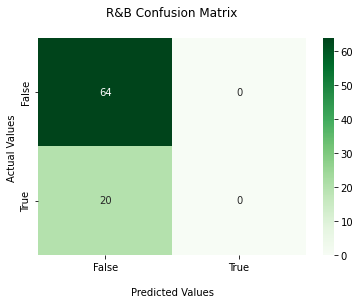

In [ ]:
#Create the matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#Create a heatmap
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')

#Give the matrix labels
ax.set_title('R&B Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Create the labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix
plt.show()

**Predict Rock Genre**

In [ ]:
# Fit BERT model
bertModel = bert.fit(data['Lyrics'], data['Rock'])
#biobertModel = biobert.fit(data['Lyrics'], data['Rock'])
#scibertModel = scibert.fit(data['Lyrics'], data['Rock'])

Loading bert-base-cased model...
Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 377, validation data size: 41



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training  :   0%|          | 0/12 [00:00<?, ?it/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 1, Train loss: 0.5753, Val loss: 0.5408, Val accy: 73.17%



Training  :   0%|          | 0/12 [00:00<?, ?it/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 2, Train loss: 0.5471, Val loss: 0.5391, Val accy: 73.17%



Training  :   0%|          | 0/12 [00:00<?, ?it/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 3, Train loss: 0.5396, Val loss: 0.5400, Val accy: 73.17%



In [ ]:
# Split the data into a train and test set
# Our data is imbalanced so we stratify by Genre
X_train, X_test, y_train, y_test = train_test_split(data['Lyrics'],data['Rock'], test_size=0.2, stratify=data['Genre'])

In [ ]:
# Make predictions using our trained BERT model
y_pred = bertModel.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.describe()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Predicting:   0%|          | 0/11 [00:00<?, ?it/s]

,0
count,84.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
# Fetch the performance metrics
models_scores_table = pd.DataFrame({'BERT':[accuracy_score(y_test,y_pred).mean(),
                                                precision_score(y_test,y_pred).mean(),
                                                recall_score(y_test,y_pred).mean(),
                                                f1_score(y_test,y_pred).mean(),
                                                roc_auc_score(y_test,y_pred).mean()],},
                                      
                                        index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
# Return models performance metrics scores in a data frame
models_scores_table

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,BERT
Accuracy,0.761905
Precision,0.000000
Recall,0.000000
F1 Score,0.000000
AUC,0.500000


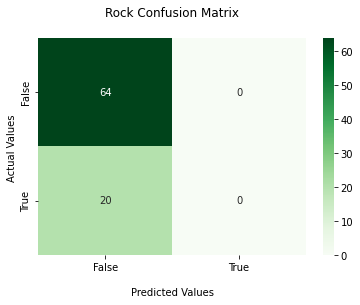

In [ ]:
#Create the matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#Create a heatmap
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')

#Give the matrix labels
ax.set_title('Rock Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Create the labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix
plt.show()

**Predict Pop Genre**

In [ ]:
# Fit BERT model
bertModel = bert.fit(data['Lyrics'], data['Pop'])

Loading bert-base-cased model...
Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 377, validation data size: 41



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training  :   0%|          | 0/12 [00:00<?, ?it/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 1, Train loss: 0.5077, Val loss: 0.4532, Val accy: 80.49%



Training  :   0%|          | 0/12 [00:00<?, ?it/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 2, Train loss: 0.4386, Val loss: 0.4514, Val accy: 80.49%



Training  :   0%|          | 0/12 [00:00<?, ?it/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 3, Train loss: 0.4442, Val loss: 0.4568, Val accy: 80.49%



In [ ]:
# Split the data into a train and test set
# Our data is imbalanced so we stratify by Genre
X_train, X_test, y_train, y_test = train_test_split(data['Lyrics'],data['Pop'], test_size=0.2, stratify=data['Pop'])

In [ ]:
# Make predictions using our trained BERT model
y_pred = bertModel.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.describe()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Predicting:   0%|          | 0/11 [00:00<?, ?it/s]

,0
count,84.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
# Fetch the performance metrics
models_scores_table = pd.DataFrame({'BERT':[accuracy_score(y_test,y_pred).mean(),
                                                precision_score(y_test,y_pred).mean(),
                                                recall_score(y_test,y_pred).mean(),
                                                f1_score(y_test,y_pred).mean(),
                                                roc_auc_score(y_test,y_pred).mean()],},
                                      
                                        index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
# Return models performance metrics scores in a data frame
models_scores_table

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,BERT
Accuracy,0.845238
Precision,0.000000
Recall,0.000000
F1 Score,0.000000
AUC,0.500000


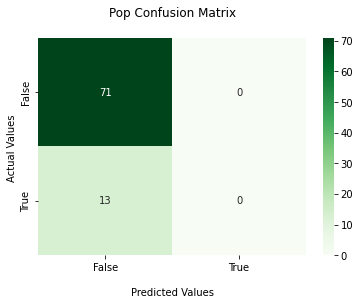

In [ ]:
# Confusion matrix
# Create the matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#Create a heatmap
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')

#Give the matrix labels
ax.set_title('Pop Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Create the labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix
plt.show()

**Predict Country Genre**

In [ ]:
# Fit BERT model
bertModel = bert.fit(data['Lyrics'], data['Country'])

Loading bert-base-cased model...
Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 377, validation data size: 41



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training  :   0%|          | 0/12 [00:00<?, ?it/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 1, Train loss: 0.5848, Val loss: 0.6718, Val accy: 75.61%



Training  :   0%|          | 0/12 [00:00<?, ?it/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 2, Train loss: 0.5144, Val loss: 0.6102, Val accy: 75.61%



Training  :   0%|          | 0/12 [00:00<?, ?it/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 3, Train loss: 0.4431, Val loss: 0.6782, Val accy: 73.17%



In [ ]:
# Split the data into a train and test set
# Our data is imbalanced so we stratify by Genre
X_train, X_test, y_train, y_test = train_test_split(data['Lyrics'],data['Country'], test_size=0.2, stratify=data['Country'])

In [ ]:
# Make predictions using our trained BERT model
y_pred = bertModel.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.describe()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Predicting:   0%|          | 0/11 [00:00<?, ?it/s]

,0
count,84.000000
mean,0.130952
std,0.339374
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
# Fetch the performance metrics
models_scores_table = pd.DataFrame({'BERT':[accuracy_score(y_test,y_pred).mean(),
                                                precision_score(y_test,y_pred).mean(),
                                                recall_score(y_test,y_pred).mean(),
                                                f1_score(y_test,y_pred).mean(),
                                                roc_auc_score(y_test,y_pred).mean()],},
                                      
                                        index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
# Return models performance metrics scores in a data frame
models_scores_table

,BERT
Accuracy,0.845238
Precision,0.818182
Recall,0.450000
F1 Score,0.580645
AUC,0.709375


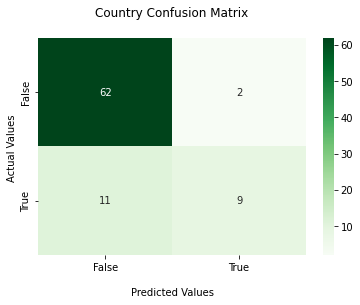

In [ ]:
# Confusion matrix
# Create the matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#Create a heatmap
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')

#Give the matrix labels
ax.set_title('Country Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Create the labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix
plt.show()

**Predict Rap Genre**

In [ ]:
# Fit BERT model
bertModel = bert.fit(data['Lyrics'], data['Rap'])

Loading bert-base-cased model...
Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 377, validation data size: 41



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training  :   0%|          | 0/12 [00:00<?, ?it/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 1, Train loss: 0.5946, Val loss: 0.4306, Val accy: 87.80%



Training  :   0%|          | 0/12 [00:00<?, ?it/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 2, Train loss: 0.4230, Val loss: 0.4181, Val accy: 75.61%



Training  :   0%|          | 0/12 [00:00<?, ?it/s]

Validating:   0%|          | 0/6 [00:00<?, ?it/s]


Epoch 3, Train loss: 0.3039, Val loss: 0.2969, Val accy: 78.05%



In [ ]:
# Split the data into a train and test set
# Our data is imbalanced so we stratify by Genre
X_train, X_test, y_train, y_test = train_test_split(data['Lyrics'],data['Country'], test_size=0.2, stratify=data['Country'])

In [ ]:
# Make predictions using our trained BERT model
y_pred = bertModel.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.describe()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Predicting:   0%|          | 0/11 [00:00<?, ?it/s]

,0
count,84.000000
mean,0.273810
std,0.448591
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# Fetch the performance metrics
models_scores_table = pd.DataFrame({'BERT':[accuracy_score(y_test,y_pred).mean(),
                                                precision_score(y_test,y_pred).mean(),
                                                recall_score(y_test,y_pred).mean(),
                                                f1_score(y_test,y_pred).mean(),
                                                roc_auc_score(y_test,y_pred).mean()],},
                                      
                                        index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
# Return models performance metrics scores in a data frame
models_scores_table

,BERT
Accuracy,0.511905
Precision,0.043478
Recall,0.050000
F1 Score,0.046512
AUC,0.353125


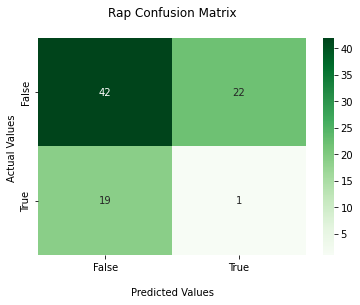

In [ ]:
# Confusion matrix
# Create the matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#Create a heatmap
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')

#Give the matrix labels
ax.set_title('Rap Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Create the labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix
plt.show()